This is just a notebook to share code, feel free to modify anything or add to it as it's not critical. 

In [6]:
#Can take a while to load
import os
from IPython.display import display, Latex, Markdown
import numpy as np
from scipy.optimize import minimize, curve_fit
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

# Toy Data Generator

The coded version of:

$N(V_b) \approx 4\pi l_p \lambda_D^2 n(0)\frac{\exp\left(-\mathcal{V}-\frac{\exp(-\mathcal{V})}{\sqrt{\pi\mathcal{V}}}\left(\gamma+\ln\left(\frac{R_w^2}{4\lambda_D^2}\right)\right) \right)}{\sqrt{\pi}\left(1+\frac{\exp(-\mathcal{V})}{\sqrt{\pi\mathcal{V}}}\right)\sqrt{\mathcal{V}+\frac{\exp(-\mathcal{V})}{\sqrt{\pi\mathcal{V}}}\left(\gamma+\ln\left(\frac{R_w^2}{4\lambda_D^2}\right)\right)}}$

With input of Vb and T in kelvin. 

In [3]:
lp = 0.1 #length of the plasma, 10cm in SI
e = 1.602 * 10**-19 #electron charge in SI
n0 = 10**14 #Plasma density at r=0
Rw = 0.02 #Cylinder Radius in SI
phi0 = -1 #First term in plasma self-potential 
gamma = 0.5772 #Euler–Mascheroni constant 
k = 1.3806 * 10**(-23) #Boltzmann constant
e0 = 8.854 * 10**(-12) #vacuum permittivity
def debye(t): return np.sqrt(e0*k*t/(n0*e*e))
def binnedn(Vb,t): 
    def scriptV(Vb,t): return (-1)*e*(Vb - phi0)/(t*k)
    return 4 * np.pi * lp * debye(t)**2 * n0 * np.exp((-1)*scriptV(Vb,t) - \
    np.exp((-1)*scriptV(Vb,t))/(np.sqrt(np.pi)*scriptV(Vb,t)) * (gamma + np.log(Rw**2/(4*debye(t)**2)))) * \
    1 / ((np.sqrt(np.pi)*(1 + np.exp((-1)*scriptV(Vb,t))) * np.sqrt(scriptV(Vb,t) + np.exp((-1)*scriptV(Vb,t))*(gamma + np.log(Rw**2/(4*debye(t)**2))))))

Plotting relevant range at 50K.

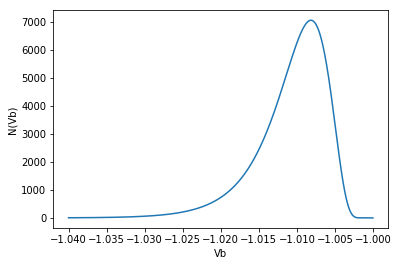

In [7]:
x = np.linspace(-1.00001,-1.04,1000) # 1000 linearly spaced numbers
y = binnedn(x,50) 

# compose plot
pylab.plot(x,y) 
plt.ylabel('N(Vb)')
plt.xlabel('Vb')
pylab.show() # show the plot

Found the peak of the data set and tried fitting to it (because you mentioned to only use the increasing values). 

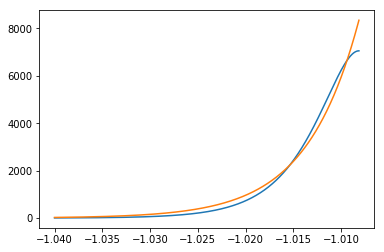

In [8]:
minvalue=minimize(lambda x: -binnedn(x[0],50) , [-1.010], bounds=[(-1.020,-1.005)])
x = np.linspace(-1.04,minvalue['x'],1000) # 1000 linearly spaced numbers
y = binnedn(x,50)
[a,b]=curve_fit(lambda oneovert,a,b: a*np.exp(b*oneovert),  x,  y, maxfev = 10000)
fit = a[0]*np.exp(x*a[1])
plt.figure(1)
pylab.plot(x,y)
pylab.plot(x,fit)
plt.show()

In [9]:
T1 = 1/a[1]
T1

0.005484535943995502

An input T of 50 produces an output T of 0.005484535943995502 with that fit region.

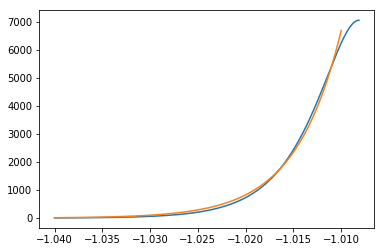

In [10]:
x2 = np.linspace(-1.04,-1.010,100)
y2 = binnedn(x2,50)
[c,d]=curve_fit(lambda oneovert,a,b: a*np.exp(b*oneovert),  x2,  y2, maxfev = 10000)
fit2 = c[0]*np.exp(x2*c[1])
pylab.plot(x,y)
pylab.plot(x2,fit2)
plt.show()

In [11]:
T2 = 1/c[1]
T2

0.0047865108510233879

An input T of 50 produces an output T of 0.0047865108510233879 with that fit region.